# This AI model uses the CNN to classify objects into 10 classes of fashion clothes viz. "t-shirt", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", and "ankle boot".

##### The data is from the MNIST data set of fashion. It contains 60000 training images and 10000 testing images. With each imag ebeing 28x28 grayscale images.

### Loading the dataset from keras

In [1]:
import tensorflow as tf

In [2]:
# Downloading the data set and splitting it
mnist = tf.keras.datasets
(X_train, y_train), (X_test, y_test) = mnist.fashion_mnist.load_data()

In [3]:
# mnist fashion data set contains 60000 training samples
# and 10000 testing samples
print("-----------------------------------------------------------------------")
print("The length of training set (X) is", len(X_train))
print("The length of training set (y) is", len(y_train))
print("-----------------------------------------------------------------------")
print("The length of testing set (X) is", len(X_test))
print("The length of testing set (y) is", len(y_test))
print("-----------------------------------------------------------------------")

# Shape of the image is 28x28
print("The shape of the 6th element in the training set is", X_train[5].shape)
print("")
print("The 6th element from the training set consists of:-\n", X_train[5])
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
The length of training set (X) is 60000
The length of training set (y) is 60000
-----------------------------------------------------------------------
The length of testing set (X) is 10000
The length of testing set (y) is 10000
-----------------------------------------------------------------------
The shape of the 6th element in the training set is (28, 28)

The 6th element from the training set consists of:-
 [[  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143
    9   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197
  206 188 126  17   0   0   0   0   0   0]
 [  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179
  183 189 195 185  82   0   0   0   0   0]
 [  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174
  175 175 177 183 188  12   0   0   0   0]
 [  0   0   0   0  25 194 180 178 174 184 1

In [4]:
# For visualisation and mathematical operations
import matplotlib.pyplot as plt
import numpy as np

#### **Visualising Some Sample Images**

In [5]:
# First we shall make a tuple named 'classes' which will store all the class
# names of the data-set in the same order as is in MNIST-Fashion data-set
classes = (
    "t-shirt",
    "trouser",
    "pullover",
    "dress",
    "coat",
    "sandal", 
    "shirt",
    "sneaker",
    "bag",
    "ankle boot"
)

In [6]:
# Function taking the index as the only argument and plots the image
def plotImage(index):
    plt.figure(figsize=(5, 5))
    plt.imshow(X_train[index], cmap="Greys")
    plt.axis("off")
    plt.title("{} ({})".format(classes[y_train[index]], y_train[index]))
# end function plotImage()

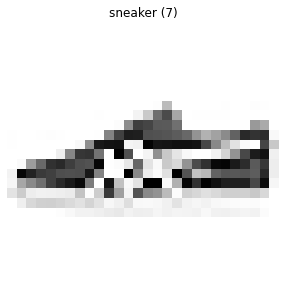

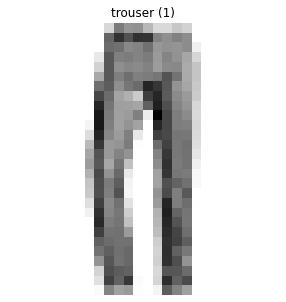

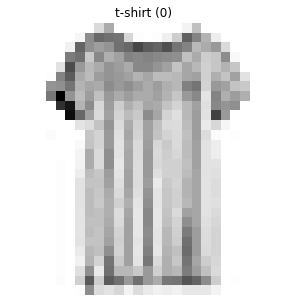

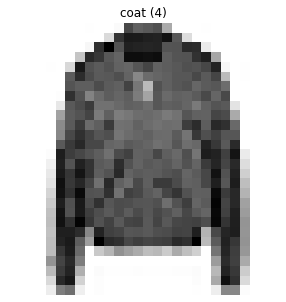

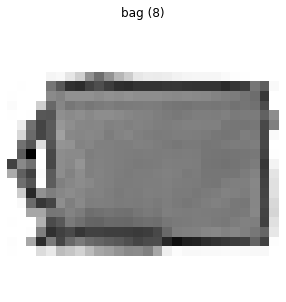

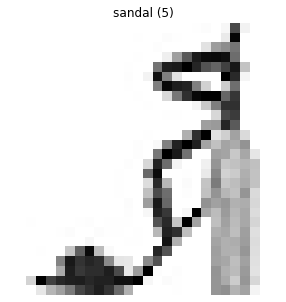

In [7]:
# Visualising random images
for i in np.random.randint(0, 10000, 6):
    plotImage(i)

#### *Resizing Image to Make It Suitable for Applying Convolution Operations*

In [8]:
IMG_SIZE = 28
# Increasing by one dimension (making it 4-dimensional) so that it can work with
# Keras API
X_trainr = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_testr = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("-----------------------------------------------------------------------")
print("Training samples shape:", X_trainr.shape)
print("Testing samples shape:", X_testr.shape)
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Training samples shape: (60000, 28, 28, 1)
Testing samples shape: (10000, 28, 28, 1)
-----------------------------------------------------------------------


### Scaling/Normalisation
#### *division by 255 to bring in the range 0 to 1*

In [9]:
X_trainr = X_trainr / 255
X_testr = X_testr / 255

#### *Splitting the Data set into Validation Sets*

In [10]:
# Importing packages
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_trainr,
                                                    y_train,
                                                    test_size=0.2,
                                                    random_state=2020)

In [11]:
print("-----------------------------------------------------------------------")
print("The shape of X_train set:", X_train.shape, end="\n\n")
print("The shape of y_train set:", y_train.shape)
print("-----------------------------------------------------------------------")
print("The shape of X_validation set:", X_validation.shape, end="\n\n")
print("The shape of y_validation set:", y_validation.shape)
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
The shape of X_train set: (48000, 28, 28, 1)

The shape of y_train set: (48000,)
-----------------------------------------------------------------------
The shape of X_validation set: (12000, 28, 28, 1)

The shape of y_validation set: (12000,)
-----------------------------------------------------------------------


### Creating Deep Neural Netwrok
#### *and training on 60000 traning samples*

In [12]:
# Importing the required functions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D
from tensorflow.keras.layers import Flatten, Conv2D

## **Build 1: Simple CNN**

In [13]:
# Creating simple Convolutional Neural Network
fc_model_1 = Sequential([
    Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding="valid",
           activation="relu", input_shape=[28, 28, 1]),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation="relu"), # hidden layers
    Dense(units=10, activation="softmax")
])

In [14]:
# Displaying the fc_model_1 summary
print("-----------------------------------------------------------------------")
print("Here is the FIRST model's summary:-")
display(fc_model_1.summary())
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Here is the FIRST model's summary:-
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 

None

-----------------------------------------------------------------------


### Compiling the Model

In [15]:
fc_model_1.compile(
    optimizer="adam", # controls the learning rate
    loss="sparse_categorical_crossentropy", # estimates the loss of the model
    metrics=['accuracy']
)

### Training the Model

In [16]:
fc_model_1.fit(X_train, y_train, batch_size=512, epochs=10,
             validation_data=(X_validation, y_validation))

Epoch 1/10
94/94 [==============================] - 23s 196ms/step - loss: 0.6268 - accuracy: 0.7973 - val_loss: 0.4226 - val_accuracy: 0.8552
Epoch 2/10
94/94 [==============================] - 13s 139ms/step - loss: 0.3676 - accuracy: 0.8708 - val_loss: 0.3476 - val_accuracy: 0.8792
Epoch 3/10
94/94 [==============================] - 13s 143ms/step - loss: 0.3171 - accuracy: 0.8889 - val_loss: 0.3233 - val_accuracy: 0.8857
Epoch 4/10
94/94 [==============================] - 14s 153ms/step - loss: 0.2927 - accuracy: 0.8966 - val_loss: 0.3096 - val_accuracy: 0.8907
Epoch 5/10
94/94 [==============================] - 14s 154ms/step - loss: 0.2723 - accuracy: 0.9042 - val_loss: 0.3044 - val_accuracy: 0.8932
Epoch 6/10
94/94 [==============================] - 15s 165ms/step - loss: 0.2555 - accuracy: 0.9097 - val_loss: 0.2848 - val_accuracy: 0.9004
Epoch 7/10
94/94 [==============================] - 15s 156ms/step - loss: 0.2422 - accuracy: 0.9140 - val_loss: 0.2897 - val_accuracy: 0.8992

### Evaluation of the Model

In [17]:
fc_loss, fc_accuracy = fc_model_1.evaluate(X_test, y_test)
print("-----------------------------------------------------------------------")
print("Accuracy Percentage of FIRST AI Model: ", fc_accuracy * 100, "%",
      sep="")
print("-----------------------------------------------------------------------")

313/313 [==============================] - 2s 6ms/step - loss: 110.6141 - accuracy: 0.7625
-----------------------------------------------------------------------
Accuracy Percentage of FIRST AI Model: 76.2499988079071%
-----------------------------------------------------------------------


### Model Predictions

In [18]:
# Creating a list of predictions of all the test images
y_predictions = fc_model_1.predict(X_test)
y_predictedClasses = [np.argmax(probability) for probability in y_predictions]

In [19]:
# Function to make predictions which takes the index as the only argument
def makePrediction(index):
    plt.figure(figsize=(5, 5))
    plt.imshow(X_test[index].reshape(28, 28), cmap="Greys")
    plt.axis("off")
    
    predictionStatus = "Correct Prediction!"
    if y_predictedClasses[index] != y_test[index]:
        predictionStatus = "Incorrect Prediction!"
    
    plt.title(
        "Actual: {} ({})\nPredicted: {} ({})\n{}".format(
            classes[y_test[index]],
            y_test[index],
            classes[y_predictedClasses[index]],
            y_predictedClasses[index],
            predictionStatus
        )
    )
# end function makePrediction()

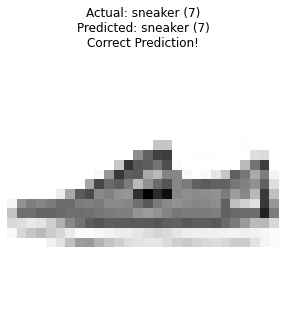

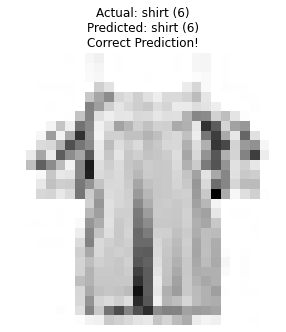

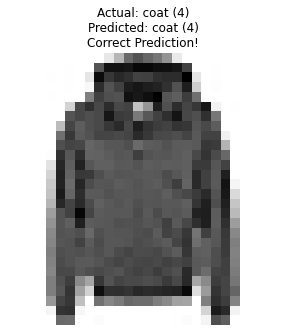

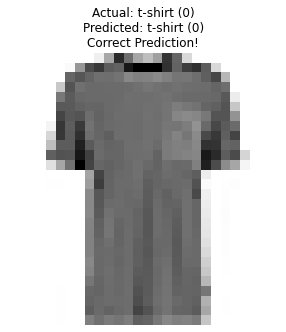

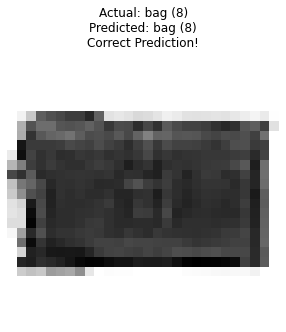

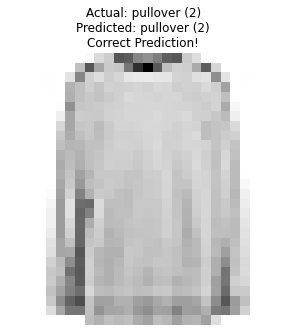

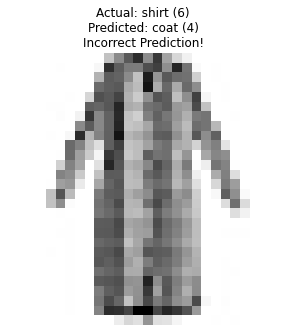

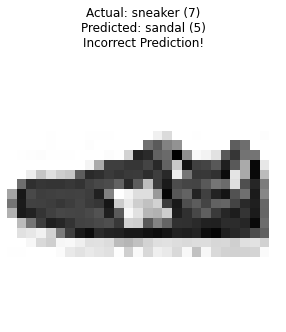

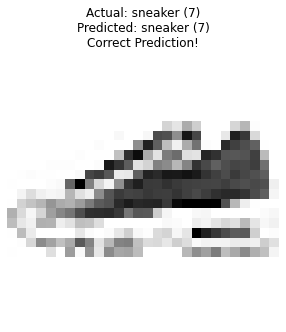

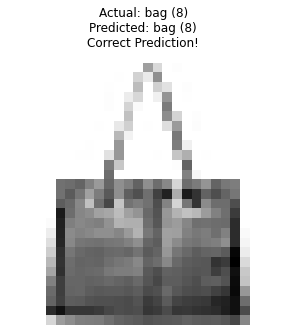

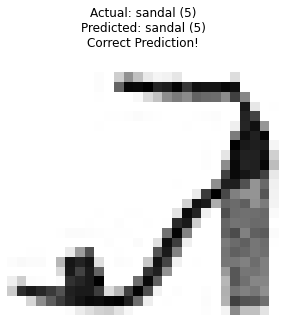

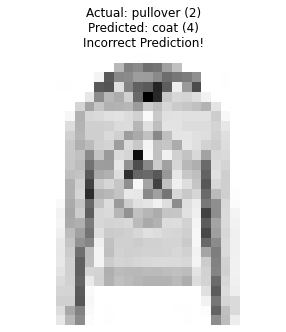

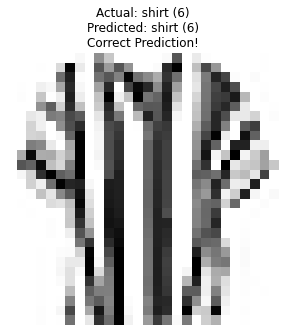

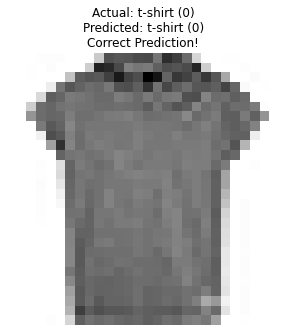

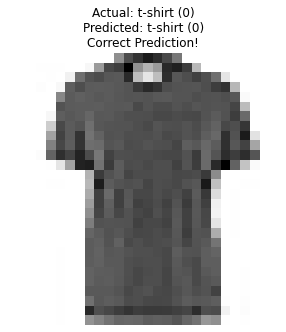

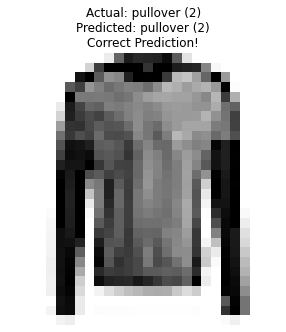

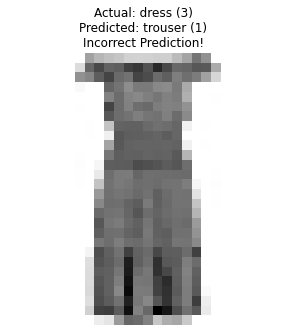

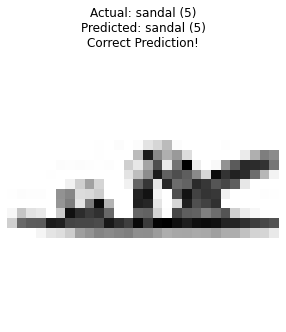

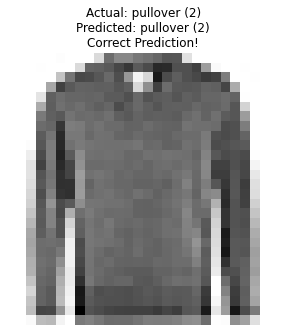

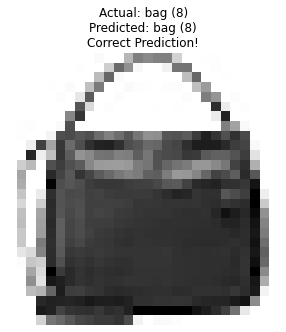

In [20]:
# Making predictions for random indices
for i in np.random.randint(0, 10000, 20):
    makePrediction(i)

### Confusion Matrix

In [21]:
confMatx = tf.math.confusion_matrix(labels=y_test,
                                    predictions=y_predictedClasses)

print("-----------------------------------------------------------------------")
print("Simple Confusion Matrix For FIRST Model:", confMatx, sep="\n")
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Simple Confusion Matrix For FIRST Model:
tf.Tensor(
[[499   9  14  38 165   2 249   0  24   0]
 [  0 979   0   4  15   0   0   0   2   0]
 [  6   1 431   5 459   0  96   0   2   0]
 [  2 141   5 632 200   0  15   0   5   0]
 [  0   0   1   5 981   0  12   0   1   0]
 [  0   0   0   0   1 997   0   0   0   2]
 [ 18   2  11  24 478   0 452   0  15   0]
 [  0   0   0   0   0 217   0 731   0  52]
 [  0   2   0   0  13   9   1   0 975   0]
 [  0   0   0   0   1  35   1  15   0 948]], shape=(10, 10), dtype=int32)
-----------------------------------------------------------------------


#### *Visualising the Confusion Matrix Using Seaborn Library*

Text(0.5, 1.0, 'Heatmap of the Confusion Matrx (for the FIRST Model)')

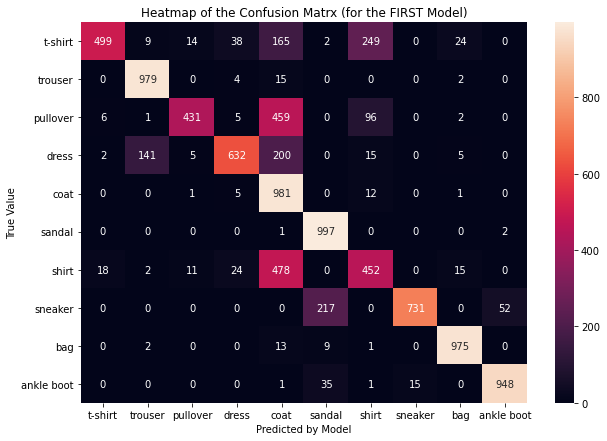

In [22]:
import seaborn as sn

plt.figure(figsize = (10, 7))
sn.heatmap(confMatx, annot=True, fmt='d', xticklabels=classes,
           yticklabels=classes)
plt.xlabel("Predicted by Model")
plt.ylabel("True Value")
plt.title("Heatmap of the Confusion Matrx (for the FIRST Model)")

In [23]:
print("Saving the FIRST model...")
fc_model_1.save("fashionMNISTmodel_CNN_1.h5")
print("Saved!")

Saving the FIRST model...
Saved!


## **Build 2: Complex CNN**

In [24]:
# Importing the required functions
from tensorflow.keras.layers import Dropout

In [25]:
fc_model_2 = Sequential([
    Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding="valid",
           activation="relu", input_shape=[28, 28, 1]),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding="same",
           activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation="relu"), # hidden layers
    Dropout(0.25), # to avoid overfitting
    Dense(units=256, activation="relu"),
    Dropout(0.25),
    Dense(units=128, activation="relu"),
    Dense(units=10, activation="softmax"),
])

In [26]:
# Displaying the fc_model_2 summary
print("-----------------------------------------------------------------------")
print("Here is the SECOND model's summary:-")
display(fc_model_2.summary())
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Here is the SECOND model's summary:-
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
           

None

-----------------------------------------------------------------------


### Compiling the Model

In [27]:
fc_model_2.compile(
    optimizer="adam", # controls the learning rate
    loss="sparse_categorical_crossentropy", # estimates the loss of the model
    metrics=['accuracy']
)

### Training the Model

In [28]:
fc_model_2.fit(X_train, y_train, batch_size=512, epochs=30,
             validation_data=(X_validation, y_validation))

Epoch 1/30
94/94 [==============================] - 18s 178ms/step - loss: 1.0029 - accuracy: 0.6306 - val_loss: 0.5513 - val_accuracy: 0.7822
Epoch 2/30
94/94 [==============================] - 16s 168ms/step - loss: 0.5262 - accuracy: 0.8026 - val_loss: 0.4468 - val_accuracy: 0.8376
Epoch 3/30
94/94 [==============================] - 15s 163ms/step - loss: 0.4410 - accuracy: 0.8385 - val_loss: 0.3927 - val_accuracy: 0.8578
Epoch 4/30
94/94 [==============================] - 15s 165ms/step - loss: 0.3868 - accuracy: 0.8591 - val_loss: 0.3819 - val_accuracy: 0.8562
Epoch 5/30
94/94 [==============================] - 16s 172ms/step - loss: 0.3563 - accuracy: 0.8702 - val_loss: 0.3430 - val_accuracy: 0.8742
Epoch 6/30
94/94 [==============================] - 16s 168ms/step - loss: 0.3350 - accuracy: 0.8771 - val_loss: 0.3214 - val_accuracy: 0.8829
Epoch 7/30
94/94 [==============================] - 15s 161ms/step - loss: 0.3169 - accuracy: 0.8845 - val_loss: 0.3166 - val_accuracy: 0.8823

### Evaluation of the Model

In [29]:
fc_loss, fc_accuracy = fc_model_2.evaluate(X_test, y_test)
print("-----------------------------------------------------------------------")
print("Accuracy Percentage of SECOND AI Model: ", fc_accuracy * 100, "%",
      sep="")
print("-----------------------------------------------------------------------")

313/313 [==============================] - 6s 8ms/step - loss: 74.6301 - accuracy: 0.8083
-----------------------------------------------------------------------
Accuracy Percentage of SECOND AI Model: 80.83000183105469%
-----------------------------------------------------------------------


### Model Predictions

In [30]:
# Creating a list of predictions of all the test images
y_predictions = fc_model_2.predict(X_test)
y_predictedClasses = [np.argmax(probability) for probability in y_predictions]

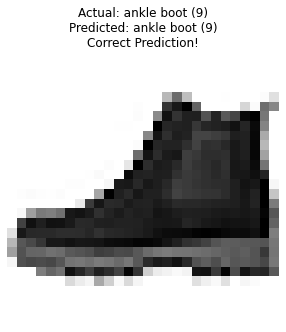

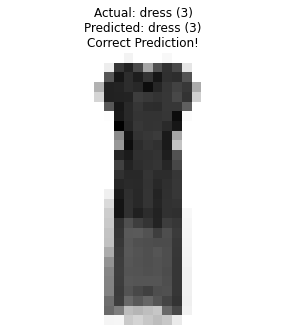

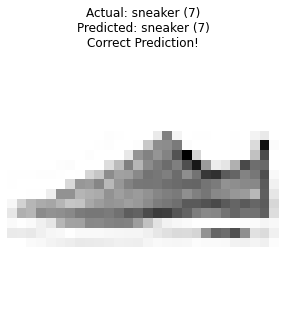

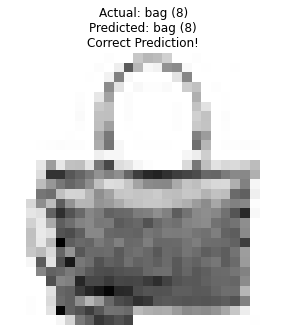

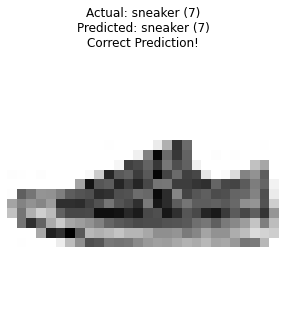

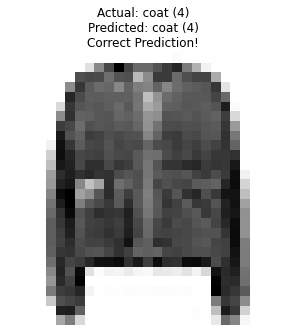

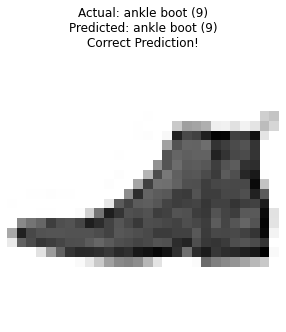

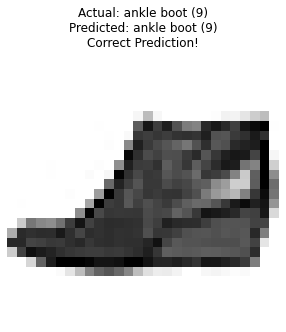

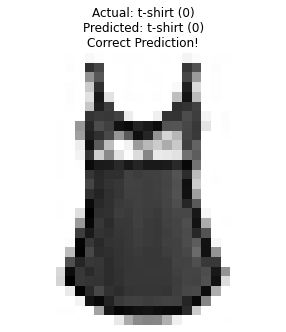

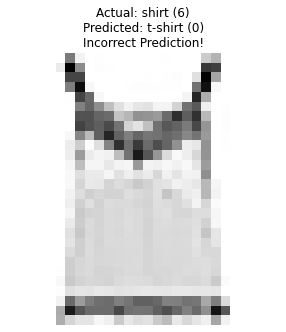

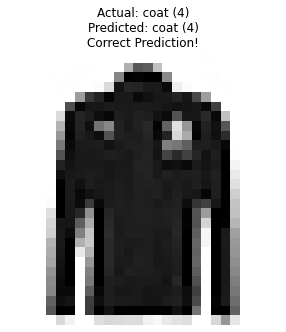

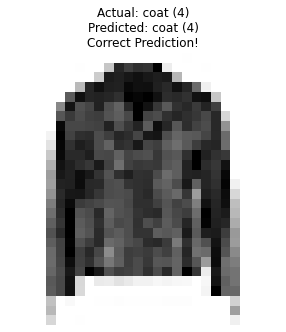

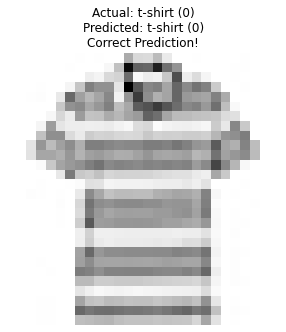

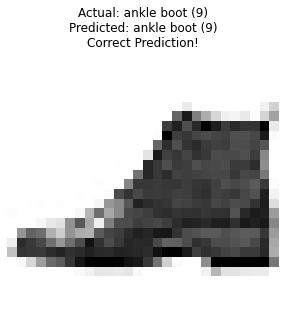

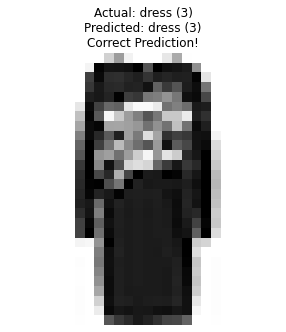

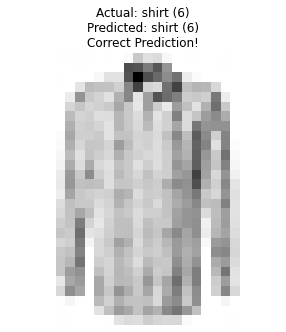

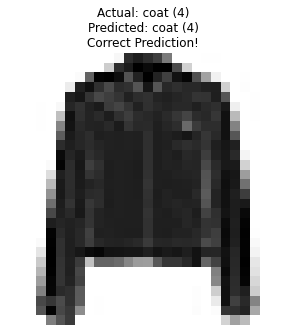

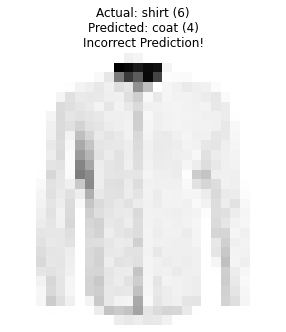

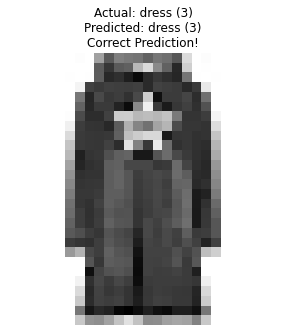

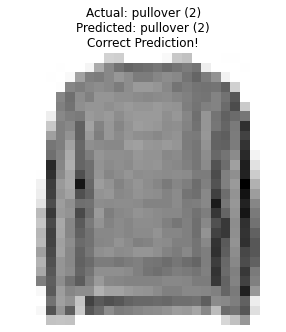

In [31]:
# Making predictions for random indices
for i in np.random.randint(300, 10000, 20):
    makePrediction(i)

### Confusion Matrix

In [32]:
confMatx = tf.math.confusion_matrix(labels=y_test,
                                    predictions=y_predictedClasses)

print("-----------------------------------------------------------------------")
print("Simple Confusion Matrix For SECOND Model:", confMatx, sep="\n")
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Simple Confusion Matrix For SECOND Model:
tf.Tensor(
[[638   3   9  35  41   1 259   0  14   0]
 [  3 988   0   4   4   0   0   0   1   0]
 [ 13   2 468   8 404   0 102   0   3   0]
 [  8  30   2 760 152   0  37   0  11   0]
 [  1   1   3  12 965   1  13   0   4   0]
 [  0   0   0   0   0 998   0   2   0   0]
 [ 59   4   9  23 366   0 532   0   7   0]
 [  0   0   0   0   0 141   0 830   2  27]
 [  2   1   0   2  15   4   3   1 972   0]
 [  0   0   0   0   1  31   1  34   1 932]], shape=(10, 10), dtype=int32)
-----------------------------------------------------------------------


#### *Visualising the Confusion Matrix*

Text(0.5, 1.0, 'Heatmap of the Confusion Matrx (for SECOND Model)')

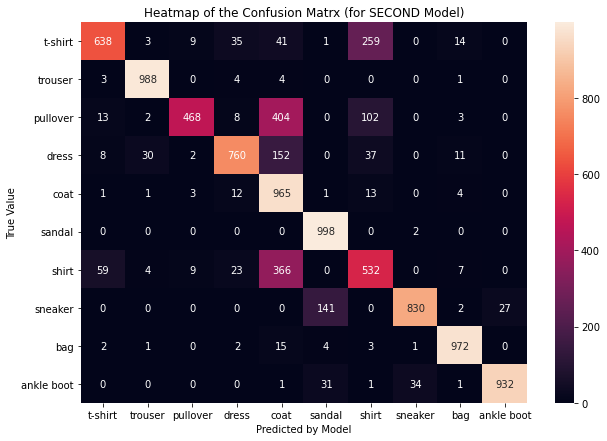

In [33]:
import seaborn as sn

plt.figure(figsize = (10, 7))
sn.heatmap(confMatx, annot=True, fmt='d', xticklabels=classes,
           yticklabels=classes)
plt.xlabel("Predicted by Model")
plt.ylabel("True Value")
plt.title("Heatmap of the Confusion Matrx (for SECOND Model)")

In [34]:
print("Saving the SECOND model...")
fc_model_2.save("fashionMNISTmodel_CNN_2.h5")
print("Saved!")

Saving the SECOND model...
Saved!


## **Build 3: More Complex CNN**

In [35]:
# Building the third model which has even more dense (hidden) layers
fc_model_3 = Sequential([
    Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding="valid",
           activation="relu", input_shape=[28, 28, 1]),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=3, strides=(2, 2), padding="same",
           activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding="same",
           activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation="relu"), # hidden layers
    Dropout(0.25), # to avoid overfitting
    Dense(units=256, activation="relu"),
    Dropout(0.5),
    Dense(units=256, activation="relu"),
    Dropout(0.25),
    Dense(units=128, activation="relu"),
    Dropout(0.10),
    Dense(units=10, activation="softmax"),
])

In [36]:
# Displaying the fc_model_3 summary
print("-----------------------------------------------------------------------")
print("Here is the THIRD model's summary:-")
display(fc_model_3.summary())
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Here is the THIRD model's summary:-
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 64)          73792     
            

None

-----------------------------------------------------------------------


### Compiling the Model

In [37]:
fc_model_3.compile(
    optimizer="adam", # controls the learning rate
    loss="sparse_categorical_crossentropy", # estimates the loss of the model
    metrics=['accuracy']
)

### Training the Model

In [38]:
fc_model_3.fit(X_train, y_train, batch_size=512, epochs=50,
             validation_data=(X_validation, y_validation))

Epoch 1/50
94/94 [==============================] - 31s 313ms/step - loss: 1.1777 - accuracy: 0.5362 - val_loss: 0.6168 - val_accuracy: 0.7533
Epoch 2/50
94/94 [==============================] - 29s 310ms/step - loss: 0.5868 - accuracy: 0.7796 - val_loss: 0.4792 - val_accuracy: 0.8219
Epoch 3/50
94/94 [==============================] - 34s 367ms/step - loss: 0.4832 - accuracy: 0.8201 - val_loss: 0.4153 - val_accuracy: 0.8478
Epoch 4/50
94/94 [==============================] - 35s 369ms/step - loss: 0.4211 - accuracy: 0.8482 - val_loss: 0.3896 - val_accuracy: 0.8615
Epoch 5/50
94/94 [==============================] - 33s 347ms/step - loss: 0.3703 - accuracy: 0.8686 - val_loss: 0.3349 - val_accuracy: 0.8787
Epoch 6/50
94/94 [==============================] - 35s 376ms/step - loss: 0.3353 - accuracy: 0.8807 - val_loss: 0.3110 - val_accuracy: 0.8878
Epoch 7/50
94/94 [==============================] - 32s 338ms/step - loss: 0.3074 - accuracy: 0.8936 - val_loss: 0.3093 - val_accuracy: 0.8898

### Evaluation of the Model

In [39]:
fc_loss, fc_accuracy = fc_model_3.evaluate(X_test, y_test)
print("-----------------------------------------------------------------------")
print("Accuracy Percentage of THIRD AI Model: ", fc_accuracy * 100, "%",
      sep="")
print("-----------------------------------------------------------------------")

313/313 [==============================] - 4s 10ms/step - loss: 166.1326 - accuracy: 0.7516
-----------------------------------------------------------------------
Accuracy Percentage of THIRD AI Model: 75.16000270843506%
-----------------------------------------------------------------------


### Model Predictions

In [40]:
# Creating a list of predictions of all the test images
y_predictions = fc_model_3.predict(X_test)
y_predictedClasses = [np.argmax(probability) for probability in y_predictions]

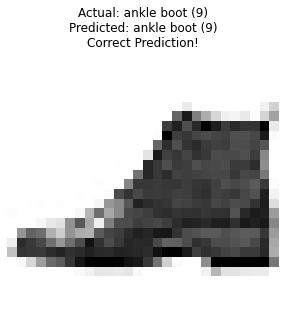

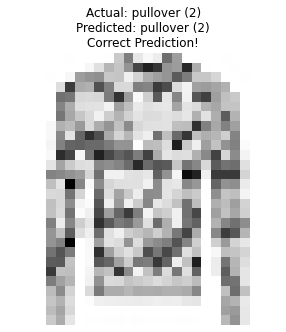

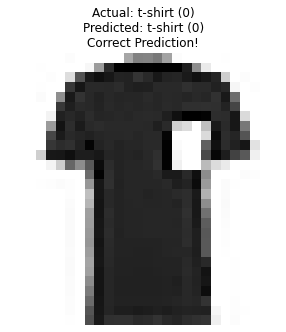

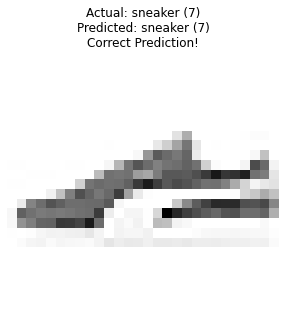

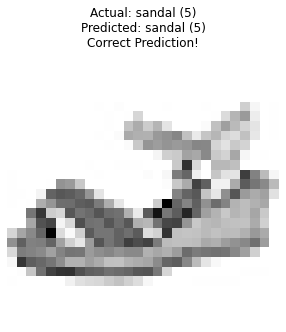

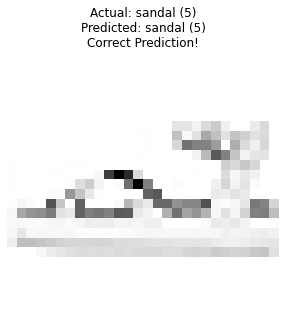

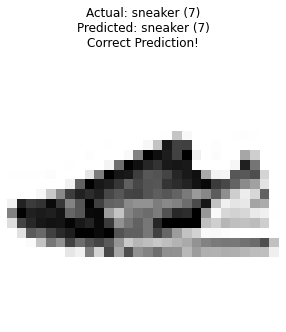

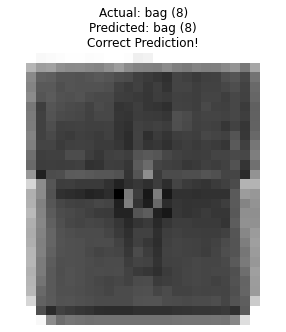

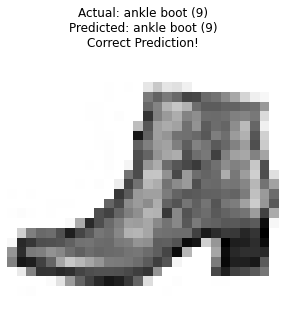

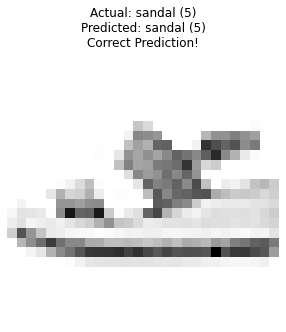

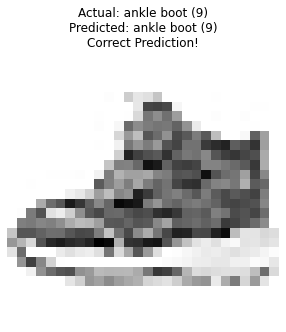

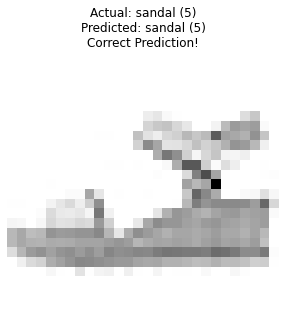

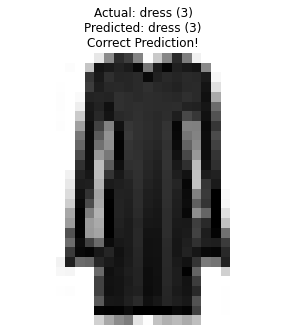

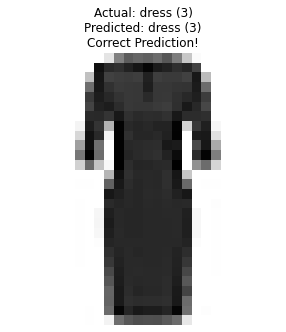

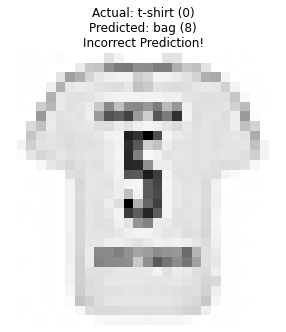

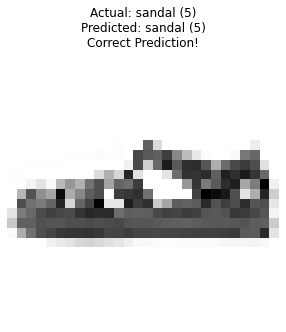

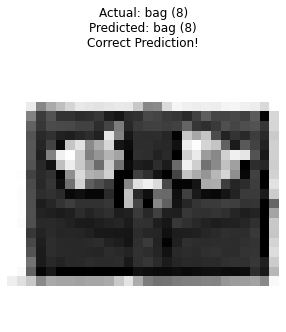

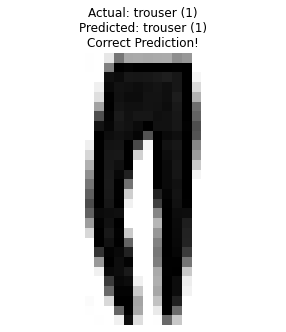

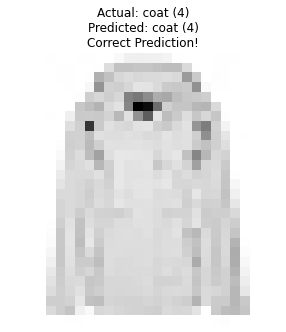

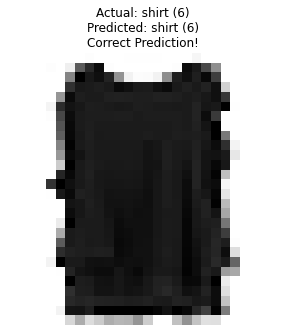

In [41]:
# Making predictions for random indices
for i in np.random.randint(500, 8989, 20):
    makePrediction(i)

### Confusion Matrix

In [42]:
confMatx = tf.math.confusion_matrix(labels=y_test,
                                    predictions=y_predictedClasses)

print("-----------------------------------------------------------------------")
print("Simple Confusion Matrix For THIRD Model:", confMatx, sep="\n")
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Simple Confusion Matrix For THIRD Model:
tf.Tensor(
[[299   7  31  13  43   2 573   0  31   1]
 [  2 976   1   3  12   0   5   0   1   0]
 [  1   0 391   3 340   2 250   0  13   0]
 [ 10  47  15 595 213   1  95   0  19   5]
 [  0   1   8   2 943   0  37   0   8   1]
 [  0   0   4   0   1 966   0   6  11  12]
 [ 21   5  11   7 304   1 618   0  32   1]
 [  1   2   3   1   0 100   0 817  17  59]
 [  2   5   6   2  18   3   3   1 956   4]
 [  2   1   0   0   0  16   0  23   3 955]], shape=(10, 10), dtype=int32)
-----------------------------------------------------------------------


#### *Visualising the Confusion Matrix*

Text(0.5, 1.0, 'Heatmap of the Confusion Matrx (for THIRD Model)')

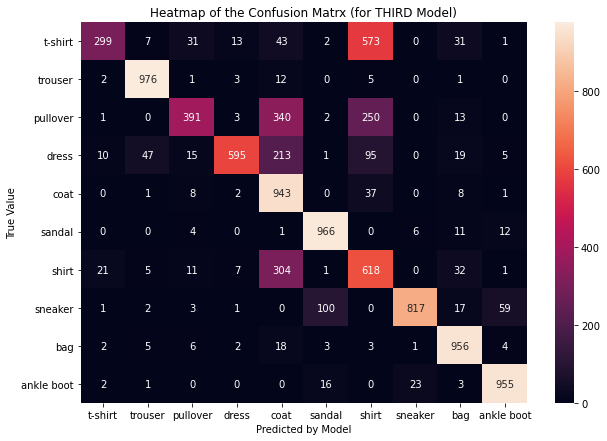

In [43]:
import seaborn as sn

plt.figure(figsize = (10, 7))
sn.heatmap(confMatx, annot=True, fmt='d', xticklabels=classes,
           yticklabels=classes)
plt.xlabel("Predicted by Model")
plt.ylabel("True Value")
plt.title("Heatmap of the Confusion Matrx (for THIRD Model)")

In [44]:
print("Saving the THIRD model...")
fc_model_3.save("fashionMNISTmodel_CNN_3.h5")
print("Saved!")

Saving the THIRD model...
Saved!


# **---------------------------------------------------------------------------------------------------**